<a href="https://colab.research.google.com/github/stevengregori92/World-Happiness-Report-2016/blob/main/World_Happiness_Report_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

#Import Data

In [2]:
data = pd.read_csv('2016.csv', index_col = 0)
data.head()

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


#Explore Data

In [3]:
len(data), len(data.dropna())

(157, 157)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Denmark to Burundi
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         157 non-null    object 
 1   Happiness Rank                 157 non-null    int64  
 2   Happiness Score                157 non-null    float64
 3   Lower Confidence Interval      157 non-null    float64
 4   Upper Confidence Interval      157 non-null    float64
 5   Economy (GDP per Capita)       157 non-null    float64
 6   Family                         157 non-null    float64
 7   Health (Life Expectancy)       157 non-null    float64
 8   Freedom                        157 non-null    float64
 9   Trust (Government Corruption)  157 non-null    float64
 10  Generosity                     157 non-null    float64
 11  Dystopia Residual              157 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory us

In [5]:
data.drop('Region', axis=1, inplace=True)
data.drop('Lower Confidence Interval', axis=1, inplace=True)
data.drop('Upper Confidence Interval', axis=1, inplace=True)

In [6]:
data.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [7]:
data.rename(columns={'Economy (GDP per Capita)': 'Economy'}, inplace=True)
data.rename(columns={'Health (Life Expectancy)': 'Health'}, inplace=True)
data.rename(columns={'Trust (Government Corruption)': 'Government Corruption'}, inplace=True)
data.rename(columns={'Dystopia Residual': 'Dystopia'}, inplace=True)

In [8]:
data.sort_values('Happiness Score', ascending = False)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Government Corruption,Generosity,Dystopia
Country,,,,,,,,,
Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...
Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540


#Data Visualization

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy'>

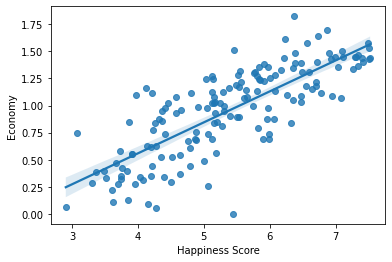

In [9]:
sns.regplot(x = 'Happiness Score',y = 'Economy', data = data)

<AxesSubplot:xlabel='Happiness Score', ylabel='Family'>

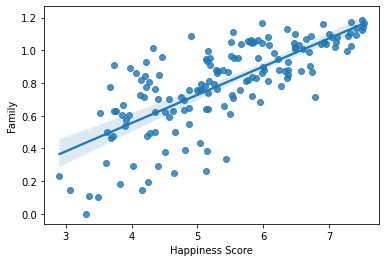

In [10]:
sns.regplot(x = 'Happiness Score',y = 'Family', data = data)

<AxesSubplot:xlabel='Happiness Score', ylabel='Health'>

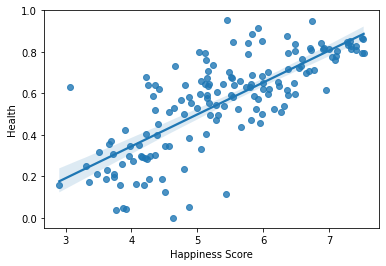

In [11]:
sns.regplot(x = 'Happiness Score',y = 'Health', data = data)

<AxesSubplot:xlabel='Happiness Score', ylabel='Freedom'>

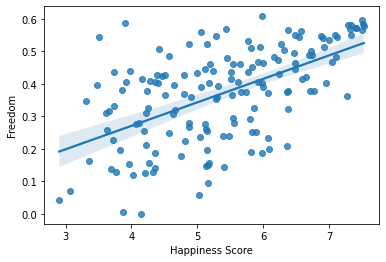

In [12]:
sns.regplot(x = 'Happiness Score', y = 'Freedom', data = data)

<AxesSubplot:xlabel='Happiness Score', ylabel='Government Corruption'>

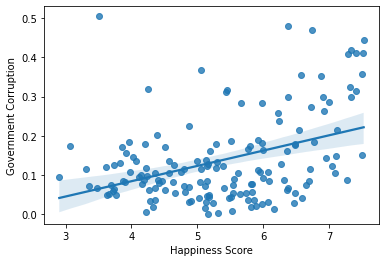

In [13]:
sns.regplot(x = 'Happiness Score', y = 'Government Corruption', data = data)

<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

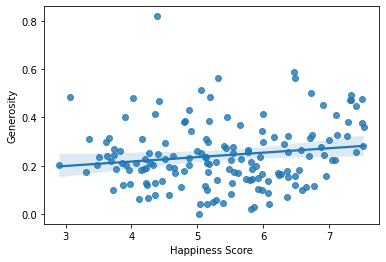

In [14]:
sns.regplot(x = 'Happiness Score', y = 'Generosity', data = data)

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia'>

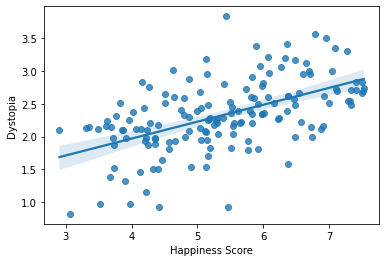

In [15]:
sns.regplot(x = 'Happiness Score', y = 'Dystopia', data = data)

#Report

Insights:
- Economy impacts Happiness Score with significant growth.
- Family impacts Happiness Score with significant growth.
- Health impacts Happiness Score with significant growth.
- Freedom impacts Happiness Score with significant growth.
- Government Corruption impacts Happiness Score with not really significant growth.
- Generosity impacts Happiness Score with a little significant growth.
- Dystopia impacts Happiness Score with not really significant growth.

Conclusion: Happiness Score in 2016 was affected with unsignificant and significant impacts. Those a unsignificant impacts are Goverment Corruption and Generosity. Those significant impact are Economy, Family, Health, and Freedom.

Suggestion: To increased Country's Happiness Score, Government should appeal their people to increased their economy quality, family relationship, health quality, and some freedom. But those actions also need people's awarness.